<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transformer_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.1.zip -O master.zip

--2024-03-21 09:19:52--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-03-21 09:19:52--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [             <=>    ]  74.54M  17.4MB/s    in 4.3s    

2024-03-21 09:19:57 (17.4 MB/s) - ‘master.zip’ saved [78165514]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
ae6bbdbf82a1c6d3446fe6c5651953a25aebd104
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-0.1/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
import copy
import json
import math
import os
import sys
from functools import partial
from inspect import signature
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    Identity,
    GPoolRecognitionHead,
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement Transformer ISLR model (Encoder only)

## Positional encoding

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self,
                 dim_model: int,
                 dropout: float,
                 max_len: int = 5000):
        super().__init__()
        self.dim_model = dim_model
        # Compute the positional encodings once in log space.
        pose = torch.zeros(max_len, dim_model, dtype=torch.float32)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, dim_model, 2).float()
                             * -(math.log(10000.0) / dim_model))
        pose[:, 0::2] = torch.sin(position * div_term)
        pose[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer("pose", pose)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self,
                feature):
        feature = feature + self.pose[None, :feature.shape[1], :]
        feature = self.dropout(feature)
        return feature

### Multi-head attention

In [ ]:
class MultiheadAttention(nn.Module):
    """Multi-headed attention (MHA) layer.

    # Args:
      - key_dim: The dimension of key.
      - query_dim: The dimension of query.
      - att_dim: The dimension of attention space.
      - out_dim: The dimension of output.
      - num_heads: The number of heads.
      - dropout: The dropout probability for attention weights.
      - add_bias: If True, use bias term in linear layers.
    """
    def __init__(self,
                 key_dim,
                 query_dim,
                 att_dim,
                 out_dim,
                 num_heads,
                 dropout,
                 add_bias):
        super().__init__()

        assert att_dim % num_heads == 0
        self.head_dim = att_dim // num_heads
        self.num_heads = num_heads
        self.scale = math.sqrt(self.head_dim)

        self.w_key = nn.Linear(key_dim, att_dim, bias=add_bias)
        self.w_value = nn.Linear(key_dim, att_dim, bias=add_bias)
        self.w_query = nn.Linear(query_dim, att_dim, bias=add_bias)

        self.w_out = nn.Linear(att_dim, out_dim, bias=add_bias)

        self.dropout_attn = nn.Dropout(p=dropout)

        self.neg_inf = None

    def reset_parameters(self, add_bias):
        """Initialize parameters with Xavier uniform distribution.

        # NOTE: For this initialization, please refer
        https://github.com/pytorch/fairseq/blob/master/fairseq/modules/multihead_attention.py  # pylint: disable=line-too-long

        """
        nn.init.xavier_uniform_(self.w_key.weight, gain=1 / math.sqrt(2))
        nn.init.xavier_uniform_(self.w_value.weight, gain=1 / math.sqrt(2))
        nn.init.xavier_uniform_(self.w_query.weight, gain=1 / math.sqrt(2))
        nn.init.xavier_uniform_(self.w_out.weight)
        if add_bias:
            nn.init.constant_(self.w_key.bias, 0.)
            nn.init.constant_(self.w_value.bias, 0.)
            nn.init.constant_(self.w_query.bias, 0.)
            nn.init.constant_(self.w_out.bias, 0.)

    def forward(self,
                key: torch.Tensor,
                value: torch.Tensor,
                query: torch.Tensor,
                mask: torch.Tensor):
        """Perform forward computation.

        # Args:
          - key: `[N, klen, key_dim]`
          - value: `[N, klen, vdim]`
          - query: `[N, qlen, query_dim]`
          - mask: `[N, qlen, klen]`
        # Returns:
          - cvec: The context vector. `[N, qlen, vdim]`
          - aws: The attention weights. `[N, H, qlen, klen]`
        """
        if self.neg_inf is None:
            self.neg_inf = float(np.finfo(
                torch.tensor(0, dtype=key.dtype).numpy().dtype).min)

        bsize, klen = key.size()[: 2]
        qlen = query.size(1)

        # key: `[N, klen, kdim] -> [N, klen, adim] -> [N, klen, H, adim/H(=hdim)]`
        # value: `[N, klen, vdim] -> [N, klen, adim] -> [N, klen, H, adim/H(=hdim)]`
        # query: `[N, qlen, qdim] -> [N, qlen, adim] -> [N, qlen, H, adim/H(=hdim)]`
        key = self.w_key(key).reshape([bsize, -1, self.num_heads, self.head_dim])
        value = self.w_value(value).reshape([bsize, -1, self.num_heads, self.head_dim])
        query = self.w_query(query).reshape([bsize, -1, self.num_heads, self.head_dim])

        # qk_score: `[N, qlen, H, hdim] x [N, klen, H, hdim] -> [N, qlen, klen, H]`
        qk_score = torch.einsum("bihd,bjhd->bijh", (query, key)) / self.scale

        # Apply mask.
        if mask is not None:
            # `[N, qlen, klen] -> [N, qlen, klen, H]`
            mask = mask.unsqueeze(3).repeat([1, 1, 1, self.num_heads])
            mask_size = (bsize, qlen, klen, self.num_heads)
            assert mask.size() == mask_size, f"{mask.size()}:{mask_size}"
            # Negative infinity should be 0 in softmax.
            qk_score = qk_score.masked_fill_(mask == 0, self.neg_inf)
        # Compute attention weight.
        attw = torch.softmax(qk_score, dim=2)
        attw = self.dropout_attn(attw)

        # cvec: `[N, qlen, klen, H] x [N, qlen, H, hdim] -> [N, qlen, H, hdim]
        # -> [N, qlen, H * hdim]`
        cvec = torch.einsum("bijh,bjhd->bihd", (attw, value))
        cvec = cvec.reshape([bsize, -1, self.num_heads * self.head_dim])
        cvec = self.w_out(cvec)
        # attw: `[N, qlen, klen, H]` -> `[N, H, qlen, klen]`
        attw = attw.permute(0, 3, 1, 2)
        return cvec, attw

### Position-wise feed-forward

In [ ]:
def select_reluwise_activation(activation):
    if activation == "relu":
        layer = torch.nn.ReLU()
    elif activation == "gelu":
        layer = torch.nn.GELU()
    elif activation in ["swish", "silu"]:
        layer = torch.nn.SILU()
    elif activation == "mish":
        layer = torch.nn.Mish()
    else:
        raise NotImplementedError(f"Activation for {activation} is not implemented.")
    return layer

In [ ]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self,
                 dim_model,
                 dim_ffw,
                 dropout,
                 activation,
                 add_bias):
       super().__init__()

       self.w_1 = nn.Linear(dim_model, dim_ffw, bias=add_bias)
       self.w_2 = nn.Linear(dim_ffw, dim_model, bias=add_bias)

       self.dropout = nn.Dropout(p=dropout)

       self.activation = select_reluwise_activation(activation)

    def forward(self, feature):
        feature = self.w_1(feature)
        feature = self.activation(feature)
        feature = self.dropout(feature)
        feature = self.w_2(feature)
        return feature

### Transformer encoder layer

In [ ]:
def make_san_mask(pad_mask,
                  causal_mask):
    """Make self-attention mask.

    # Args:
      - pad_mask: The padding mask. `[N, T]`
      - causal_mask: `[N, T (query), T (key)]`
        The mask for future context. For example, if T = 3, causal_mask
        should be:
        [[1, 0, 0,
         [1, 1, 0,
         [1, 1, 1]]
    # Returns:
      - san_mask: `[N, T (query), T (key)]`
    """
    # xx_mask: `[N, qlen, klen]`
    san_mask = pad_mask.unsqueeze(1).repeat([1, pad_mask.shape[-1], 1])
    if causal_mask is not None:
        san_mask = san_mask & causal_mask
    return san_mask

In [ ]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self,
                 dim_model,
                 num_heads,
                 dim_ffw,
                 dropout,
                 activation,
                 layer_norm_eps,
                 norm_first,
                 add_bias):
        super().__init__()

        self.norm_first = norm_first

        self.self_attn = MultiheadAttention(
            key_dim=dim_model,
            query_dim=dim_model,
            att_dim=dim_model,
            out_dim=dim_model,
            num_heads=num_heads,
            dropout=dropout,
            add_bias=add_bias)

        self.ffw = PositionwiseFeedForward(
            dim_model=dim_model,
            dim_ffw=dim_ffw,
            dropout=dropout,
            activation=activation,
            add_bias=add_bias)

        self.dropout = nn.Dropout(p=dropout)

        # The argument `bias` was added at v2.1.0.
        # So, we check whether LayerNorm has this.
        sig = signature(nn.LayerNorm)
        if "bias" in sig.parameters:
            self.norm1 = nn.LayerNorm(dim_model, eps=layer_norm_eps, bias=add_bias)
            self.norm2 = nn.LayerNorm(dim_model, eps=layer_norm_eps, bias=add_bias)
        else:
            self.norm1 = nn.LayerNorm(dim_model, eps=layer_norm_eps)
            self.norm2 = nn.LayerNorm(dim_model, eps=layer_norm_eps)

        # To store attention weights.
        self.attw = None

    def _forward_prenorm(self,
                         feature,
                         san_mask):
        """Pre-normalization structure.

        For the details, please refer
        https://arxiv.org/pdf/2002.04745v1.pdf
        """
        #################################################
        # self-attention
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = self.norm1(feature)
        feature, self.attw = self.self_attn(
            key=feature,
            value=feature,
            query=feature,
            mask=san_mask)
        feature = self.dropout(feature) + residual

        #################################################
        # FFW
        #################################################
        residual = feature
        # `[N, qlen, dim_model]`
        feature = self.norm2(feature)
        feature = self.ffw(feature)
        feature = self.dropout(feature) + residual
        return feature

    def _forward_postnorm(self,
                          feature,
                          san_mask):
        """Post-normalization structure (standard).

        """
        #################################################
        # self-attention
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature, self.attw = self.self_attn(
            key=feature,
            value=feature,
            query=feature,
            mask=san_mask)
        feature = self.dropout(feature) + residual
        feature = self.norm1(feature)

        #################################################
        # FFW
        #################################################
        residual = feature
        # `[N, qlen, dim_model]`
        feature = self.ffw(feature)
        feature = self.dropout(feature) + residual
        feature = self.norm2(feature)
        return feature

    def forward(self,
                feature,
                causal_mask=None,
                src_key_padding_mask=None):
        bsize, qlen = feature.shape[:2]
        if src_key_padding_mask is not None:
            san_mask = make_san_mask(src_key_padding_mask, causal_mask)
        elif causal_mask is not None:
            san_mask = causal_mask
        else:
            san_mask = None

        if self.norm_first:
            feature = self._forward_prenorm(feature, san_mask)
        else:
            feature = self._forward_postnorm(feature, san_mask)

        return feature

### Transformer encoder block

In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self,
                 encoder_layer,
                 num_layers,
                 dim_model,
                 dropout_pe,
                 layer_norm_eps,
                 norm_first,
                 add_bias,
                 add_tailnorm):
        super().__init__()

        self.pos_encoder = PositionalEncoding(dim_model, dropout_pe)
        self.layers = nn.ModuleList([copy.deepcopy(encoder_layer) for _ in range(num_layers)])

        # Add LayerNorm at tail position.
        # This is applied only when norm_first is True because
        # post-normalization structure includes tail-normalization in encoder
        # layers.
        if add_tailnorm and norm_first:
            # The argument `bias` was added at v2.1.0.
            # So, we check whether LayerNorm has this.
            sig = signature(nn.LayerNorm)
            if "bias" in sig.parameters:
                self.norm = nn.LayerNorm(dim_model, eps=layer_norm_eps, bias=add_bias)
            else:
                self.norm = nn.LayerNorm(dim_model, eps=layer_norm_eps)
        else:
            self.norm = Identity()

    def forward(self,
                feature,
                causal_mask,
                src_key_padding_mask):
        feature = self.pos_encoder(feature)
        for layer in self.layers:
            feature = layer(feature,
                            causal_mask,
                            src_key_padding_mask)
        feature = self.norm(feature)
        return feature

### ISLR model

In [ ]:
class TransformerEnISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 inter_channels,
                 out_channels,
                 activation="relu",
                 tren_num_layers=1,
                 tren_num_heads=1,
                 tren_dim_ffw=256,
                 tren_dropout_pe=0.1,
                 tren_dropout=0.1,
                 tren_layer_norm_eps=1e-5,
                 tren_norm_first=True,
                 tren_add_bias=True,
                 tren_add_tailnorm=True):
        super().__init__()

        # Feature extraction.
        self.linear = nn.Linear(in_channels, inter_channels)
        self.activation = select_reluwise_activation(activation)

        # Transformer-Encoder.
        enlayer = TransformerEncoderLayer(
                dim_model=inter_channels,
                num_heads=tren_num_heads,
                dim_ffw=tren_dim_ffw,
                dropout=tren_dropout,
                activation=activation,
                layer_norm_eps=tren_layer_norm_eps,
                norm_first=tren_norm_first,
                add_bias=tren_add_bias)
        self.tr_encoder = TransformerEncoder(
            encoder_layer=enlayer,
            num_layers=tren_num_layers,
            dim_model=inter_channels,
            dropout_pe=tren_dropout_pe,
            layer_norm_eps=tren_layer_norm_eps,
            norm_first=tren_norm_first,
            add_bias=tren_add_bias,
            add_tailnorm=tren_add_tailnorm)

        self.head = GPoolRecognitionHead(inter_channels, out_channels)

    def _invert_mask(self, mask):
        _mask = torch.logical_not(mask) if mask is not None else None
        return _mask

    def forward(self,
                feature,
                feature_causal_mask=None,
                feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        if torch.isnan(feature).any():
            raise ValueError()
        feature = self.activation(feature)
        if torch.isnan(feature).any():
            raise ValueError()

        # Note:
        # Different from the other layers, the attention of pytorch's
        # Transformer attends to `False` position indicated by the input masks.
        # Therefor, we invert the flags of the input masks here.
        # _feature_causal_mask = self._invert_mask(feature_causal_mask)
        # _feature_pad_mask = self._invert_mask(feature_pad_mask)

        feature = self.tr_encoder(
            feature=feature,
            causal_mask=feature_causal_mask,
            src_key_padding_mask=feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()

        # `[N, T, C] -> [N, C, T]`
        logit = self.head(feature.permute([0, 2, 1]), feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()
        return logit

## Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/26734.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])
transforms = Compose([ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 27, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_layer_norm_eps = 1e-5
tren_norm_first = False
tren_add_bias = True
tren_add_tailnorm = False

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

# 4. Train and evaluation

## 4.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.2 Run training process

### Default settings

In [ ]:
tren_norm_first = False
tren_add_tailnorm = False

model_default = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_default)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_default.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_default.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_default, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_default, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_default, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.989164 [    0/ 3881]
loss:2.161614 [ 3200/ 3881]
Done. Time:4.03055981
Training performance: 
 Avg loss:2.294787

Start validation.
Done. Time:0.2446990669999991
Validation performance: 
 Avg loss:2.146578

Start evaluation.
Done. Time:1.2060343620000253
Test performance: 
 Accuracy:19.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.854327 [    0/ 3881]
loss:1.386212 [ 3200/ 3881]
Done. Time:3.21996076100001
Training performance: 
 Avg loss:1.695011

Start validation.
Done. Time:0.3688107279999997
Validation performance: 
 Avg loss:1.772309

Start evaluation.
Done. Time:1.565402387000006
Test performance: 
 Accuracy:38.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.619399 [    0/ 3881]
loss:1.536253 [ 3200/ 3881]
Done. Time:2.6

### Apply pre-layernorm structure

In [ ]:
tren_norm_first = True
tren_add_tailnorm = False

model_pnorm = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_pnorm)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_pnorm.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_pnorm.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_pnorm, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_pnorm, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_pnorm, device)
        test_accs.append(acc)
train_losses_pnorm = np.array(train_losses)
val_losses_pnorm = np.array(val_losses)
test_accs_pnorm = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_pnorm.min()} at {np.argmin(val_losses_pnorm)+1} epoch.")
print(f"Maximum accuracy:{test_accs_pnorm.max()} at {np.argmax(test_accs_pnorm)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.756215 [    0/ 3881]
loss:2.018315 [ 3200/ 3881]
Done. Time:3.074660960000017
Training performance: 
 Avg loss:2.122694

Start validation.
Done. Time:0.41180477299997165
Validation performance: 
 Avg loss:2.091279

Start evaluation.
Done. Time:1.504258627000013
Test performance: 
 Accuracy:35.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.027998 [    0/ 3881]
loss:1.600334 [ 3200/ 3881]
Done. Time:2.956200424999963
Training performance: 
 Avg loss:1.529987

Start validation.
Done. Time:0.24549966199998607
Validation performance: 
 Avg loss:1.950843

Start evaluation.
Done. Time:1.1842586650000158
Test performance: 
 Accuracy:47.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.509073 [    0/ 3881]
loss:1.115692 [ 3200/ 3881]
Done

### Apply pre-layernorm structure with tail layernorm

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_pnorm_tnorm = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_pnorm_tnorm)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_pnorm_tnorm.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_pnorm_tnorm.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_pnorm_tnorm, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_pnorm_tnorm, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_pnorm_tnorm, device)
        test_accs.append(acc)
train_losses_pnorm_tnorm = np.array(train_losses)
val_losses_pnorm_tnorm = np.array(val_losses)
test_accs_pnorm_tnorm = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_pnorm_tnorm.min()} at {np.argmin(val_losses_pnorm_tnorm)+1} epoch.")
print(f"Maximum accuracy:{test_accs_pnorm_tnorm.max()} at {np.argmax(test_accs_pnorm_tnorm)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.398306 [    0/ 3881]
loss:1.727898 [ 3200/ 3881]
Done. Time:3.336407409000003
Training performance: 
 Avg loss:2.156250

Start validation.
Done. Time:0.4098721629999318
Validation performance: 
 Avg loss:2.064608

Start evaluation.
Done. Time:1.533364937999977
Test performance: 
 Accuracy:35.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.805961 [    0/ 3881]
loss:1.529523 [ 3200/ 3881]
Done. Time:2.7739625589999832
Training performance: 
 Avg loss:1.572617

Start validation.
Done. Time:0.23755152699993687
Validation performance: 
 Avg loss:2.082995

Start evaluation.
Done. Time:1.1288917680000168
Test performance: 
 Accuracy:30.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.558481 [    0/ 3881]
loss:0.958763 [ 3200/ 3881]
Done

### Plort result
#### Recognition performance

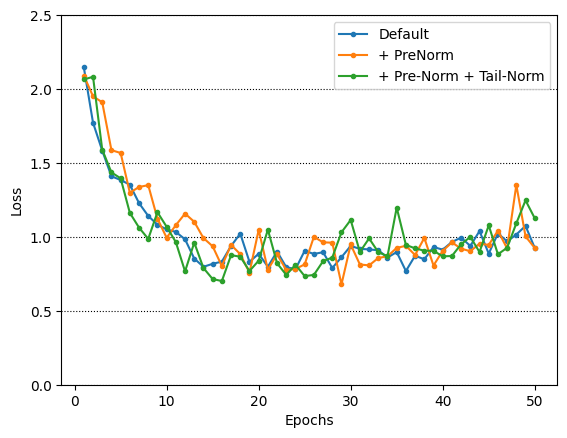

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_pnorm, label="+ PreNorm", marker=".")
plt.plot(xs, val_losses_pnorm_tnorm, label="+ Pre-Norm + Tail-Norm", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

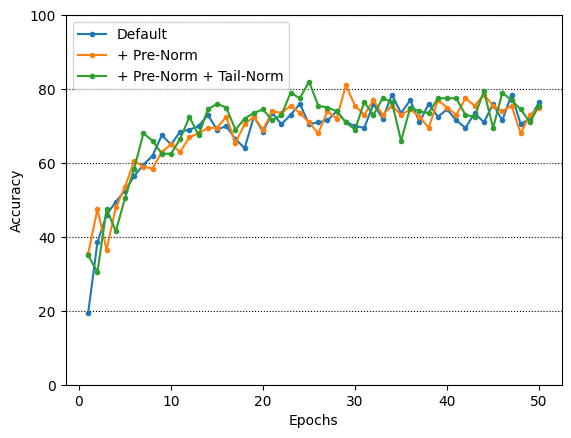

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_pnorm, label="+ Pre-Norm", marker=".")
plt.plot(xs, test_accs_pnorm_tnorm, label="+ Pre-Norm + Tail-Norm", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

#### Attention weights

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_attention(attw0, attw1):
    tlength = attw0.shape[-1]
    norm = mpl.colors.Normalize(vmin=0, vmax=max(attw0.max(), attw1.max()))

    fig, axes = plt.subplots(2, 2, figsize=(8, 8),
                             sharex="col",
                             layout="constrained")

    cmap = plt.get_cmap("Blues")

    axes[0, 0].imshow(attw0[0, 0], cmap=cmap)
    axes[0, 1].imshow(attw0[0, 1], cmap=cmap)
    axes[1, 0].imshow(attw1[0, 0], cmap=cmap)
    axes[1, 1].imshow(attw1[0, 1], cmap=cmap)

    axes[0, 0].set_title("Layer0, Head0", loc="center")
    axes[0, 1].set_title("Layer0, Head1", loc="center")
    axes[1, 0].set_title("Layer1, Head0", loc="center")
    axes[1, 1].set_title("Layer1, Head1", loc="center")

    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes.ravel().tolist(), aspect=20)
    plt.show()

In [ ]:
test_iter = iter(test_dataloader)
data = next(test_iter)
feature = data["feature"]

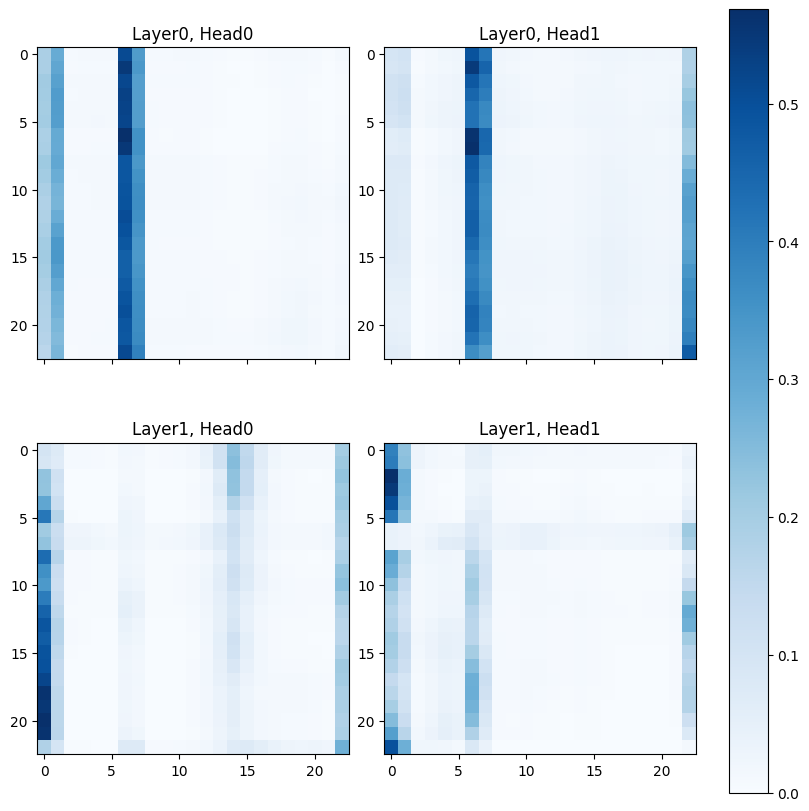

In [ ]:
logit_default = model_default(copy.deepcopy(feature).to(device))
attw_default_0 = model_default.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw_default_1 = model_default.tr_encoder.layers[1].attw.detach().cpu().numpy()

plot_attention(attw_default_0, attw_default_1)

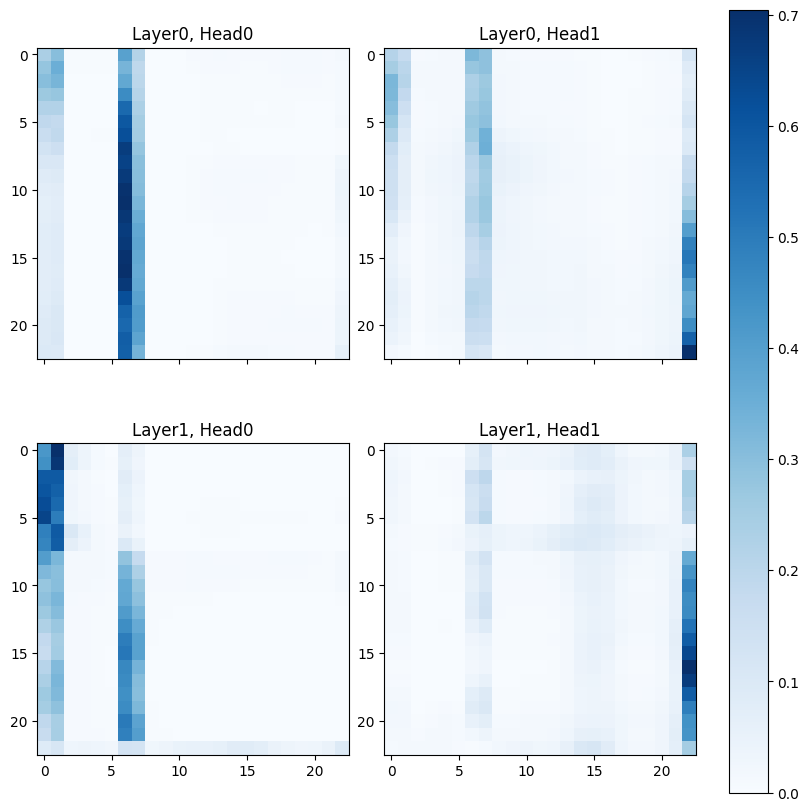

In [ ]:
logit_pnorm = model_pnorm(copy.deepcopy(feature).to(device))
attw_pnorm_0 = model_pnorm.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw_pnorm_1 = model_pnorm.tr_encoder.layers[1].attw.detach().cpu().numpy()

plot_attention(attw_pnorm_0, attw_pnorm_1)

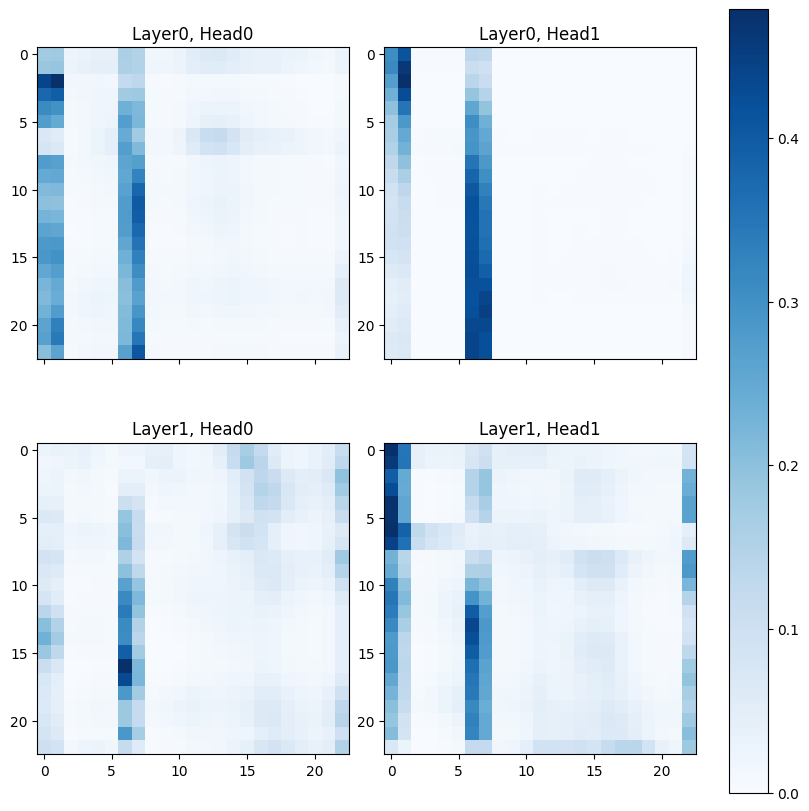

In [ ]:
logit_pnorm_tnorm = model_pnorm_tnorm(copy.deepcopy(feature).to(device))
attw_pnorm_tnorm_0 = model_pnorm_tnorm.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw_pnorm_tnorm_1 = model_pnorm_tnorm.tr_encoder.layers[1].attw.detach().cpu().numpy()

plot_attention(attw_pnorm_tnorm_0, attw_pnorm_tnorm_1)